In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import load_model

In [3]:
(Xtrain, Ytrain), (Xtest, Ytest) = datasets.cifar10.load_data()

In [9]:
Xtrain.shape, Xtest.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
Ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
Ytrain = Ytrain.reshape(-1,)
Ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

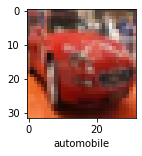

In [10]:
plot_sample(Xtrain, Ytrain, 5)

In [11]:
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0

In [16]:
model = keras.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
    
    
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [19]:
model.fit(Xtrain, Ytrain, epochs = 10, batch_size = 100)

Epoch 1/10
500/500 [==============================] - 60s 121ms/step - loss: 0.6074 - accuracy: 0.7856
Epoch 2/10
500/500 [==============================] - 61s 121ms/step - loss: 0.5922 - accuracy: 0.7903
Epoch 3/10
500/500 [==============================] - 61s 121ms/step - loss: 0.5845 - accuracy: 0.7927
Epoch 4/10
500/500 [==============================] - 61s 123ms/step - loss: 0.5751 - accuracy: 0.7950
Epoch 5/10
500/500 [==============================] - 62s 123ms/step - loss: 0.5693 - accuracy: 0.7974
Epoch 6/10
500/500 [==============================] - 61s 122ms/step - loss: 0.5574 - accuracy: 0.8016
Epoch 7/10
500/500 [==============================] - 61s 122ms/step - loss: 0.5512 - accuracy: 0.8039
Epoch 8/10
500/500 [==============================] - 61s 121ms/step - loss: 0.5472 - accuracy: 0.8040
Epoch 9/10
500/500 [==============================] - 61s 121ms/step - loss: 0.5315 - accuracy: 0.8103
Epoch 10/10
500/500 [==============================] - 62s 123ms/step - l

In [21]:
model.save('cifar10.h5')

In [2]:
loaded_model = load_model('cifar10.h5')

In [4]:
Ypred = loaded_model.predict(Xtest)

313/313 [==============================] - 12s 19ms/step


In [5]:
Ypred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.4992354e-11,
        0.0000000e+00, 5.2301864e-20, 1.0000000e+00, 0.00

In [8]:
Ypred_final = np.argmax(Ypred, axis = 1)
Ypred_final[:10]

array([0, 8, 0, 0, 8, 6, 0, 0, 3, 1], dtype=int64)

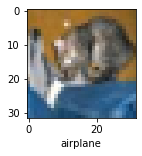

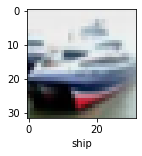

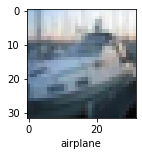

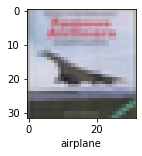

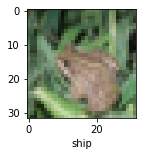

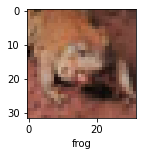

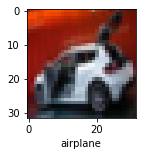

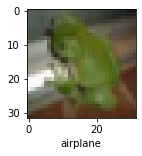

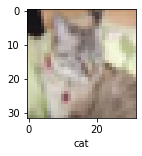

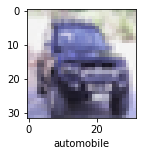

In [16]:
for i in range(0, 10):
    plot_sample(Xtest, Ypred_final, i)

In [17]:
Ypred_labelled = []
for i in range(len(Ypred_final)):
    Ypred_labelled.append(classes[Ypred_final[i]])
Ypred_labelled[:10]

['airplane',
 'ship',
 'airplane',
 'airplane',
 'ship',
 'frog',
 'airplane',
 'airplane',
 'cat',
 'automobile']